# Exercise: Coding in TensorFlow and Keras

#### Create Image Paths

In [1]:
from os.path import join

hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/hot_dog/'

hot_dog_paths = [join(hot_dog_image_dir, filename) for filename in 
                ['1000288.jpg',
                 '127117.jpg']]

not_hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/not_hot_dog/'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in 
                    ['823536.jpg',
                     '99890.jpg']]

image_paths = hot_dog_paths + not_hot_dog_paths

#### Set Up Preprocessing

In [2]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

#### Modeling

In [9]:
my_model = ResNet50('../input/ResNet-50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
image_data = read_and_prep_images(image_paths)
my_preds = my_model.predict(image_data)

from learntools.deep_learning.decode_predictions import decode_predictions

most_likely_labels = decode_predictions(my_preds, top=1, class_list_path='../input/ResNet-50/imagenet_class_index.json')

#### Visualise Your Results

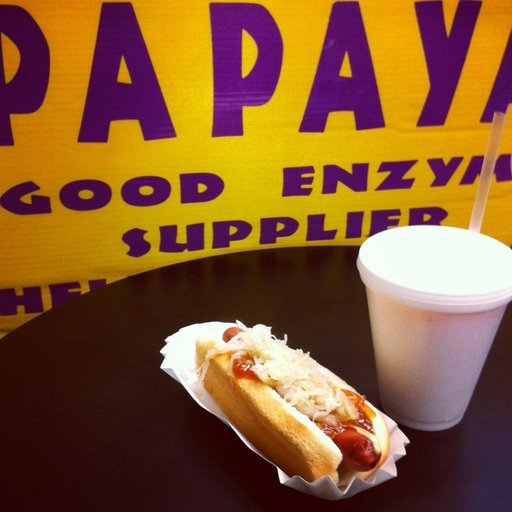

[('n07697537', 'hotdog', 0.9774525)]


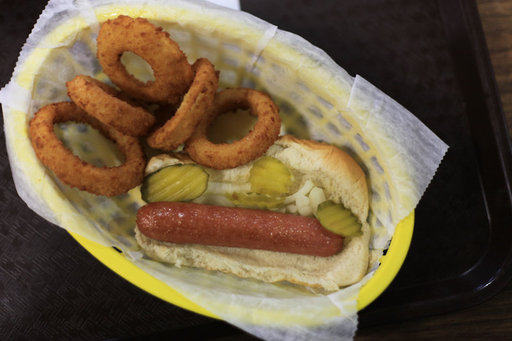

[('n07697537', 'hotdog', 0.97652996)]


In [10]:
import sys
from IPython.display import Image, display

for i, img_path in enumerate(hot_dog_paths):
    display(Image(img_path))
    print(most_likely_labels[i])